# LAB 02 : Probabilistic methods

## Exercise 01

### Draw the decision boundary between two Gaussian distributions (Case: 1D, 2 classes)

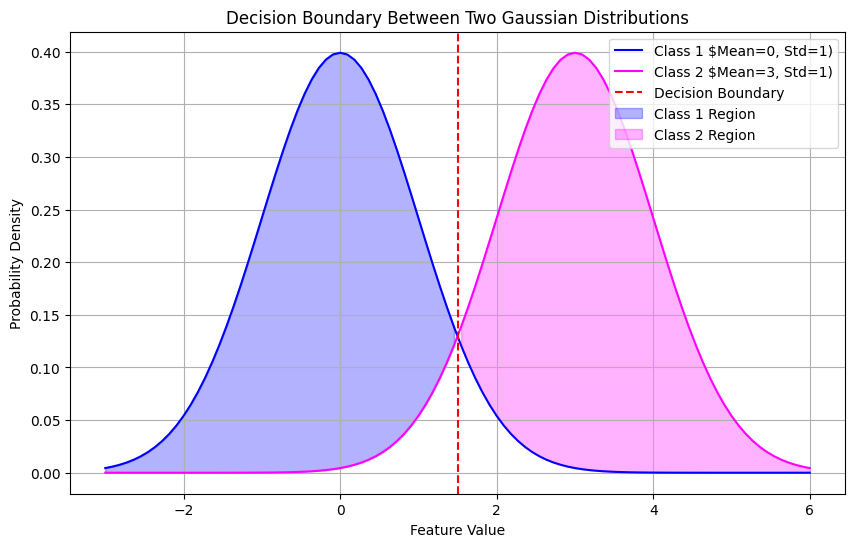

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


classes_params = {"class 1": {"mean": 0, "std": 1}, "class 2": {"mean": 3, "std": 1}}

mean1 = classes_params["class 1"]["mean"]
std1 = classes_params["class 1"]["std"]
mean2 = classes_params["class 2"]["mean"]
std2 = classes_params["class 2"]["std"]

# 100 points ranging from -3 to 6
x = np.linspace(-3, 6, 100)

pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label="Class 1 $Mean=0, Std=1)", color="blue")
plt.plot(x, pdf2, label="Class 2 $Mean=3, Std=1)", color="magenta")

decision_boundary = (mean1 + mean2) / 2
plt.axvline(x=decision_boundary, color="red", linestyle="--", label="Decision Boundary")

plt.fill_between(
    x, pdf1, pdf2, where=(pdf1 > pdf2), color="blue", alpha=0.3, label="Class 1 Region"
)
plt.fill_between(
    x,
    pdf1,
    pdf2,
    where=(pdf2 > pdf1),
    color="magenta",
    alpha=0.3,
    label="Class 2 Region",
)

plt.title("Decision Boundary Between Two Gaussian Distributions")
plt.xlabel("Feature Value")
plt.ylabel("Probability Density")

plt.legend()
plt.grid()
plt.show()

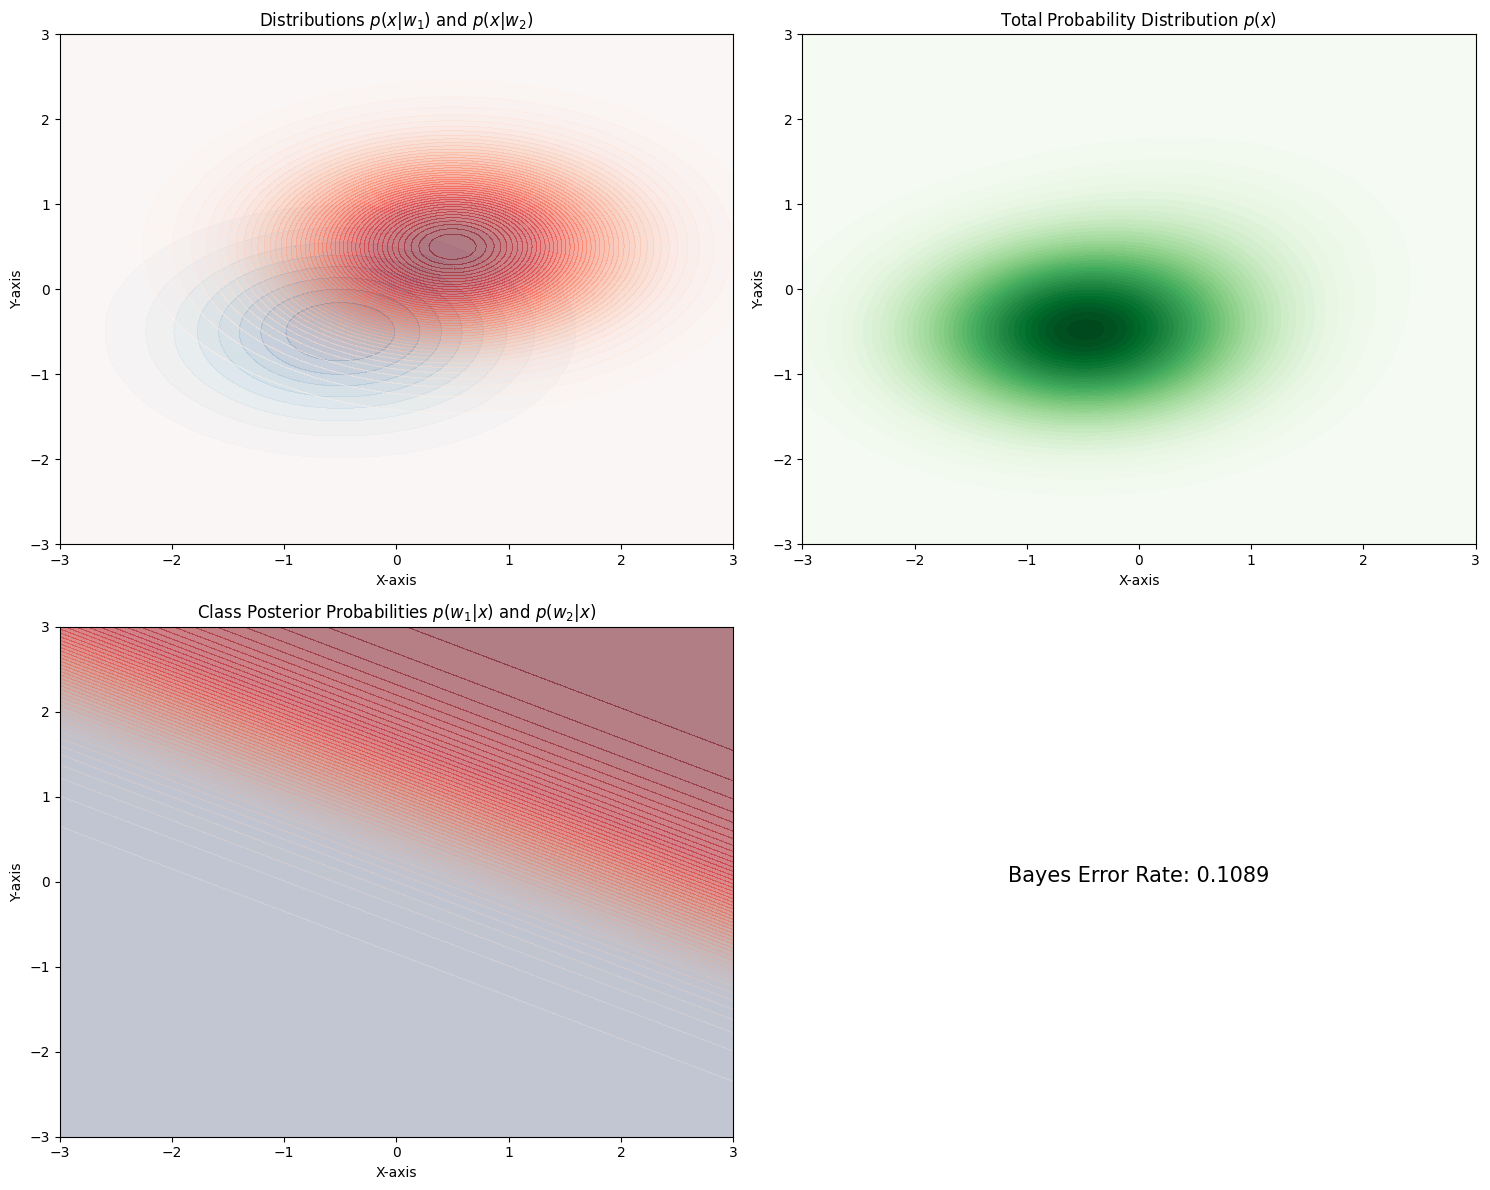

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean_w1 = np.array([-0.5, -0.5])
mean_w2 = np.array([0.5, 0.5])
covariance = np.array([[1, 0], [0, 0.5]])
p_w1 = 0.9
p_w2 = 0.1
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X1, Y1 = np.meshgrid(x_range, y_range)
X = np.column_stack([X1.ravel(), Y1.ravel()])

# probability densities
p_x_given_w1 = multivariate_normal.pdf(X, mean=mean_w1, cov=covariance)
p_x_given_w2 = multivariate_normal.pdf(X, mean=mean_w2, cov=covariance)

P_w1 = p_x_given_w1.reshape(X1.shape)
P_w2 = p_x_given_w2.reshape(X1.shape)

# total probability
p_x = p_w1 * P_w1 + p_w2 * P_w2

# posterior probabilities using Bayes' theorem
p_w1_given_x = (p_x_given_w1 * p_w1) / p_x.flatten()
p_w2_given_x = (p_x_given_w2 * p_w2) / p_x.flatten()
# reshape the posterior probabilities to the grid
P_w1_given_x = p_w1_given_x.reshape(X1.shape)
P_w2_given_x = p_w2_given_x.reshape(X1.shape)

bayes_error_rate = np.mean(np.minimum(P_w1_given_x, P_w2_given_x))

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.contourf(X1, Y1, P_w1, levels=10, cmap="Blues", alpha=0.5)
plt.contourf(X1, Y1, P_w2, levels=50, cmap="Reds", alpha=0.5)
plt.title("Distributions $p(x|w_1)$ and $p(x|w_2)$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# total probability distribution
plt.subplot(2, 2, 2)
plt.contourf(X1, Y1, p_x, levels=50, cmap="Greens")
plt.title("Total Probability Distribution $p(x)$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# class posterior probabilities
plt.subplot(2, 2, 3)
plt.contourf(X1, Y1, P_w1_given_x, levels=50, cmap="Blues", alpha=0.5)
plt.contourf(X1, Y1, P_w2_given_x, levels=50, cmap="Reds", alpha=0.5)
plt.title("Class Posterior Probabilities $p(w_1|x)$ and $p(w_2|x)$")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")


plt.subplot(2, 2, 4)
plt.axis("off")
plt.text(
    0.5, 0.5, f"Bayes Error Rate: {bayes_error_rate:.4f}", fontsize=15, ha="center"
)

plt.tight_layout()
plt.show()

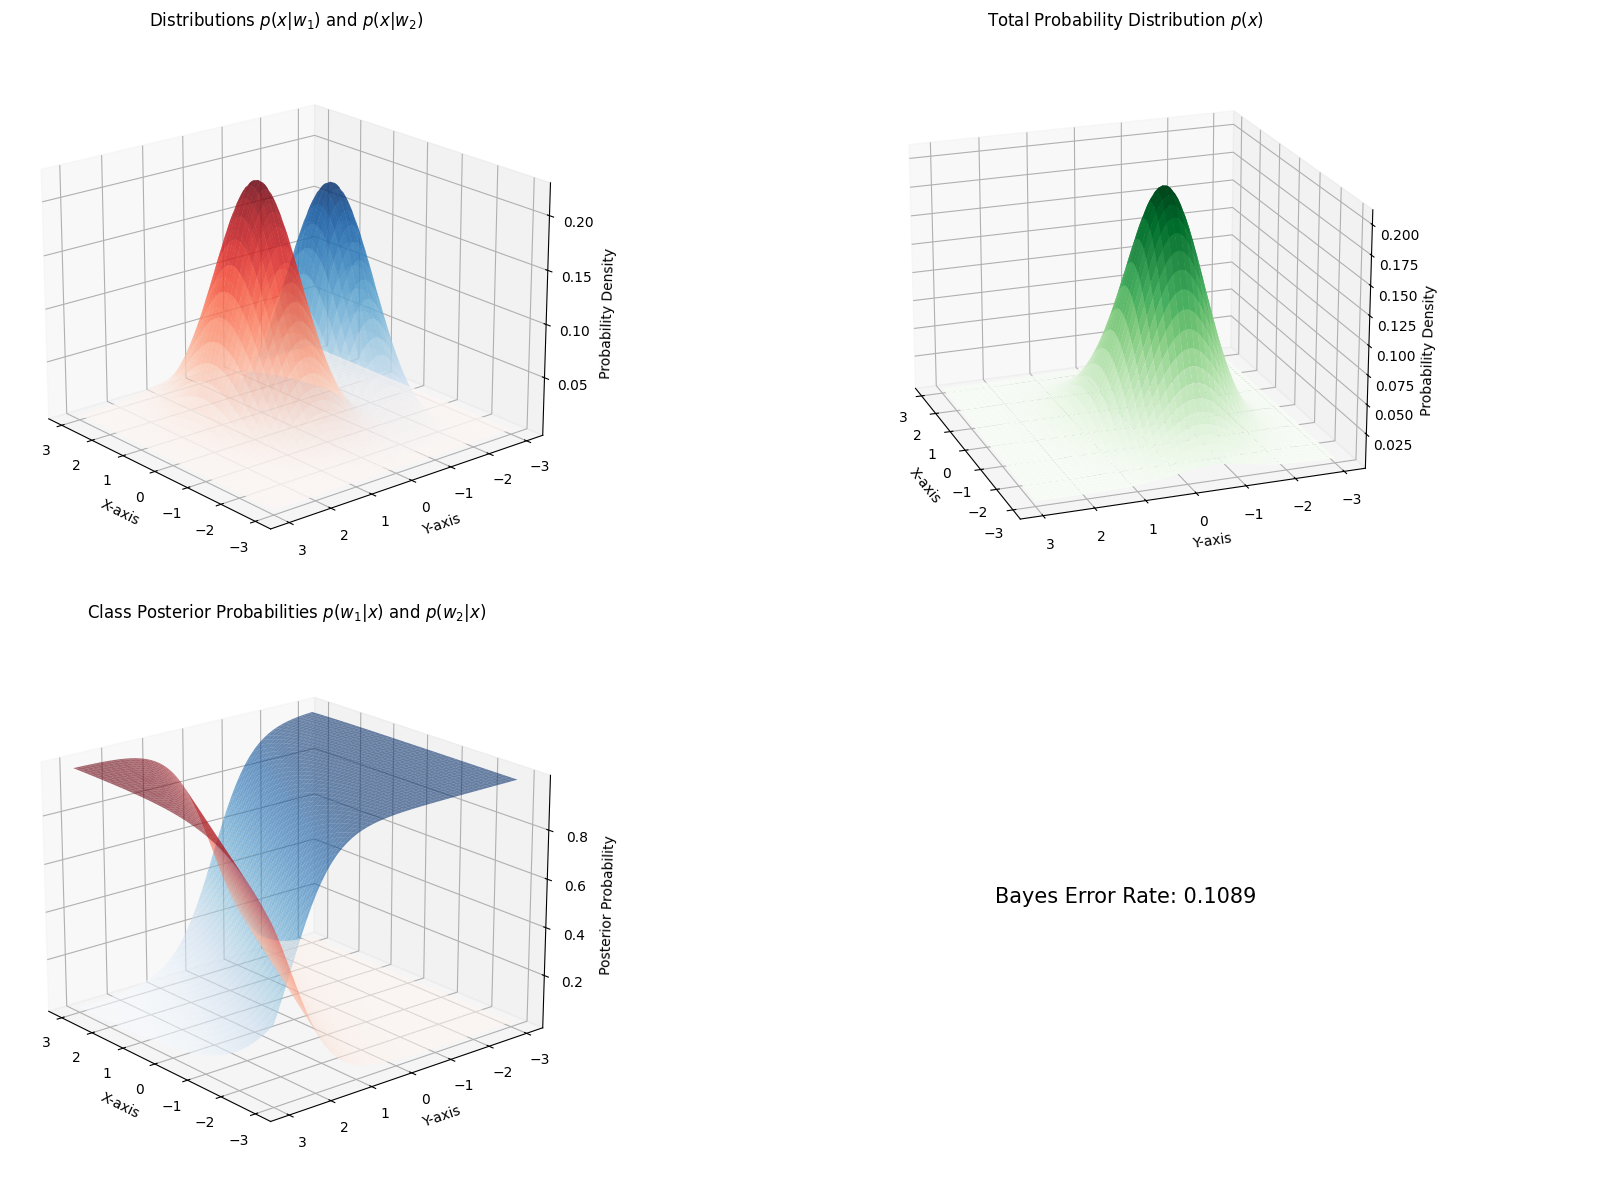

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mean_w1 = np.array([-0.5, -0.5])
mean_w2 = np.array([0.5, 0.5])
covariance = np.array([[1, 0], [0, 0.5]])
p_w1 = 0.9
p_w2 = 0.1

x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X1, Y1 = np.meshgrid(x_range, y_range)
X = np.column_stack([X1.ravel(), Y1.ravel()])

# probability densities
p_x_given_w1 = multivariate_normal.pdf(X, mean=mean_w1, cov=covariance)
p_x_given_w2 = multivariate_normal.pdf(X, mean=mean_w2, cov=covariance)

P_w1 = p_x_given_w1.reshape(X1.shape)
P_w2 = p_x_given_w2.reshape(X1.shape)

# total probability
p_x = p_w1 * P_w1 + p_w2 * P_w2

# posterior probabilities using Bayes' theorem
p_w1_given_x = (p_x_given_w1 * p_w1) / p_x.flatten()
p_w2_given_x = (p_x_given_w2 * p_w2) / p_x.flatten()
P_w1_given_x = p_w1_given_x.reshape(X1.shape)
P_w2_given_x = p_w2_given_x.reshape(X1.shape)

# Bayes Error Rate
bayes_error_rate = np.mean(np.minimum(P_w1_given_x, P_w2_given_x))


fig = plt.figure(figsize=(18, 12))

# the distributions in 3D
ax1 = fig.add_subplot(2, 2, 1, projection="3d")
ax1.plot_surface(X1, Y1, P_w1, cmap="Blues", edgecolor="none", alpha=0.6)
ax1.plot_surface(X1, Y1, P_w2, cmap="Reds", edgecolor="none", alpha=0.6)
ax1.set_title("Distributions $p(x|w_1)$ and $p(x|w_2)$")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Probability Density")
ax1.view_init(elev=20, azim=140)

# total probability distribution in 3D
ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax2.plot_surface(X1, Y1, p_x, cmap="Greens", edgecolor="none")
ax2.set_title("Total Probability Distribution $p(x)$")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Probability Density")
ax2.view_init(elev=20, azim=160)


ax3 = fig.add_subplot(2, 2, 3, projection="3d")
ax3.plot_surface(X1, Y1, P_w1_given_x, cmap="Blues", edgecolor="none", alpha=0.6)
ax3.plot_surface(X1, Y1, P_w2_given_x, cmap="Reds", edgecolor="none", alpha=0.6)
ax3.set_title("Class Posterior Probabilities $p(w_1|x)$ and $p(w_2|x)$")
ax3.set_xlabel("X-axis")
ax3.set_ylabel("Y-axis")
ax3.set_zlabel("Posterior Probability")
ax3.view_init(elev=20, azim=140)


ax4 = fig.add_subplot(2, 2, 4)
ax4.axis("off")
ax4.text(
    0.5, 0.5, f"Bayes Error Rate: {bayes_error_rate:.4f}", fontsize=15, ha="center"
)

plt.tight_layout()
plt.show()

## Exercise 03

The descriminant function : 

$$
g_i(x) = -\frac{1}{2}(x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i) - \frac{d}{2} \ln 2\pi - \frac{1}{2} \ln |\Sigma_i| + \ln(P(\omega_i))
$$

In [4]:
import numpy as np


def discriminant_function(x, mu_i, Sigma_i, P_omega_i):
    """
    Calculate the discriminant function g_i(x) for a Gaussian classifier.

    Parameters:
    - x (ndarray): The input vector.
    - mu_i (ndarray): The mean vector for class i.
    - Sigma_i (ndarray): The covariance matrix for class i.
    - P_omega_i (float): The prior probability of class i.

    Returns:
    - g_i (float): The value of the discriminant function for class i.
    """
    d = x.shape[0]  # dim
    x_mu_diff = x - mu_i

    Sigma_i_inv = np.linalg.inv(Sigma_i)
    Sigma_i_det = np.linalg.det(Sigma_i)

    term1 = -0.5 * np.dot(np.dot(x_mu_diff.T, Sigma_i_inv), x_mu_diff)
    term2 = -0.5 * d * np.log(2 * np.pi)
    term3 = -0.5 * np.log(Sigma_i_det)
    term4 = np.log(P_omega_i)

    g_i = term1 + term2 + term3 + term4
    return g_i

The Mahalanobis distance between a point $ x $ and the mean $ \mu $ of a Gaussian distribution with covariance matrix $ \Sigma $ is calculated as:

$$
d_M(x, \mu) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

where:
- $ x $ is the point to measure the distance from.
- $ \mu $ is the mean vector of the distribution.
- $ \Sigma $ is the covariance matrix of the distribution.
- $ \Sigma^{-1} $ is the inverse of the covariance matrix.
- $ (x - \mu)^T \Sigma^{-1} (x - \mu) $ is the quadratic form giving the squared Mahalanobis distance.


In [5]:
import numpy as np


def mahalanobis_distance(x, mu, Sigma):
    """
    Calculate the Mahalanobis distance between a point x and the mean mu
    for a Gaussian distribution with covariance matrix Sigma.

    Parameters:
    - x (ndarray): The point as a 1D array.
    - mu (ndarray): The mean vector of the Gaussian distribution.
    - Sigma (ndarray): The covariance matrix of the Gaussian distribution.

    Returns:
    - distance (float): The Mahalanobis distance.
    """
    x_mu_diff = x - mu
    Sigma_inv = np.linalg.inv(Sigma)

    # Mahalanobis distance calculation
    distance = np.sqrt(np.dot(np.dot(x_mu_diff.T, Sigma_inv), x_mu_diff))
    return distance

The Mahalanobis distance between a point $ x $ and the mean $ \mu $ of a Gaussian distribution with covariance matrix $ \Sigma $ is calculated using the following formula:

$$
d_M(x, \mu) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$

### Parameters:
- $ x $: The point as a 1D array.
- $ \mu $: The mean vector of the Gaussian distribution.
- $ \Sigma $: The covariance matrix of the Gaussian distribution.
- $ \Sigma^{-1} $: The inverse of the covariance matrix.

### Calculation Steps:
1. Compute the difference vector: 
   $$
   x - \mu
   $$
2. Calculate the inverse of the covariance matrix: 
   $$
   \Sigma^{-1}
   $$
3. Use the quadratic form to find the squared Mahalanobis distance:
   $$
   (x - \mu)^T \Sigma^{-1} (x - \mu)
   $$
4. Take the square root to obtain the Mahalanobis distance:
   $$
   d_M(x, \mu) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
   $$


In [6]:
import numpy as np


def minimum_distance(x, mu_i):
    """
    Calculate the minimum (Euclidean) distance between a point x and the mean mu_i.

    Parameters:
    - x (ndarray): The point as a 1D array.
    - mu_i (ndarray): The mean vector.

    Returns:
    - distance (float): The Euclidean distance between x and mu_i.
    """
    distance = np.linalg.norm(x - mu_i)
    return distance

Since in the covariance matrix ,the variances ar abitrary, we use the general fromula ( quadratic descriminant)

The discriminant functions $ g_1(x) $ and $ g_2(x) $ are given by:

$$
g_1(x) = -\frac{1}{2} (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) - \frac{1}{2} \ln |\Sigma_1|
$$

$$
g_2(x) = -\frac{1}{2} (x - \mu_2)^T \Sigma_2^{-1} (x - \mu_2) - \frac{1}{2} \ln |\Sigma_2|
$$

### Step 2: Set $ g_1(x) = g_2(x) $

To find the decision boundary, we equate $ g_1(x) $ and $ g_2(x) $:

$$
-\frac{1}{2} (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) - \frac{1}{2} \ln |\Sigma_1| = -\frac{1}{2} (x - \mu_2)^T \Sigma_2^{-1} (x - \mu_2) - \frac{1}{2} \ln |\Sigma_2|
$$


### Step 3: Simplify the Equation

1. Multiply both sides by $(-2)$ to remove the $-\frac{1}{2}$ factor:

   $$
   (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) + \ln |\Sigma_1| = (x - \mu_2)^T \Sigma_2^{-1} (x - \mu_2) + \ln |\Sigma_2|
   $$

2. Move terms involving $ x $ to one side and constant terms to the other:

   $$
   (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) - (x - \mu_2)^T \Sigma_2^{-1} (x - \mu_2) = \ln |\Sigma_2| - \ln |\Sigma_1|
   $$

3. Expand the quadratic terms on the left side. For example:

   $$
   (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) = x^T \Sigma_1^{-1} x - 2 \mu_1^T \Sigma_1^{-1} x + \mu_1^T \Sigma_1^{-1} \mu_1
   $$
   and similarly for $(x - \mu_2)^T \Sigma_2^{-1} (x - \mu_2)$.

4. Combine like terms and simplify to express the decision boundary as a quadratic equation in terms of \( x \).

### Step 4: Decision Boundary Equation

After simplification, the equation takes the form:

$$
x^T A x + b^T x + c = 0
$$

where $ A $, $ b $, and $ c $ are terms derived from $\Sigma_1$, $\Sigma_2$, $\mu_1$, and $\mu_2$.



# Also try with the second distance, for the 2nd quesion mahalanobis and another one to see the difference

# EXO 04


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import pairwise_distances_argmin

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X = iris.data[:, 2:4]  # petal length and petal width
y = iris.target
target_names = iris.target_names

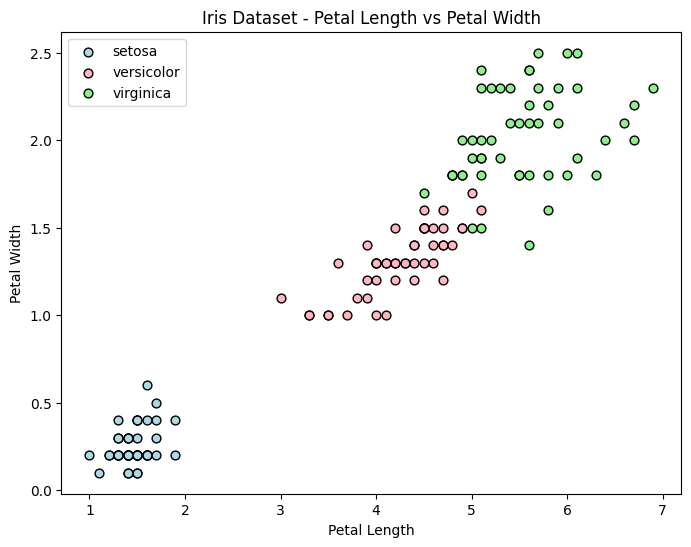

In [10]:
plt.figure(figsize=(8, 6))
colors = ["lightblue", "lightpink", "lightgreen"]
for i, color in enumerate(colors):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], c=color, label=target_names[i], edgecolor="k", s=40
    )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Petal Length vs Petal Width")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

class_means = np.array([X[y == i].mean(axis=0) for i in range(3)])
class_means_df = pd.DataFrame(
    class_means, columns=["Petal Length Mean", "Petal Width Mean"]
)
class_means_df["Class"] = iris.target_names
class_means_df = class_means_df[["Class", "Petal Length Mean", "Petal Width Mean"]]
class_means_df

,Class,Petal Length Mean,Petal Width Mean
0,setosa,1.462,0.246
1,versicolor,4.260,1.326
2,virginica,5.552,2.026


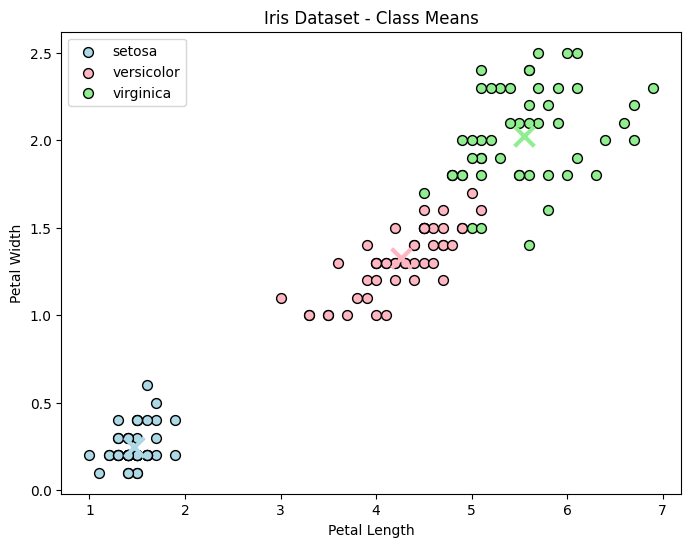

In [ ]:
plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], c=color, label=target_names[i], edgecolor="k", s=50
    )
    plt.scatter(
        class_means[i, 0],
        class_means[i, 1],
        color=color,
        marker="x",
        s=200,
        linewidths=3,
    )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Class Means")
plt.legend()
plt.show()

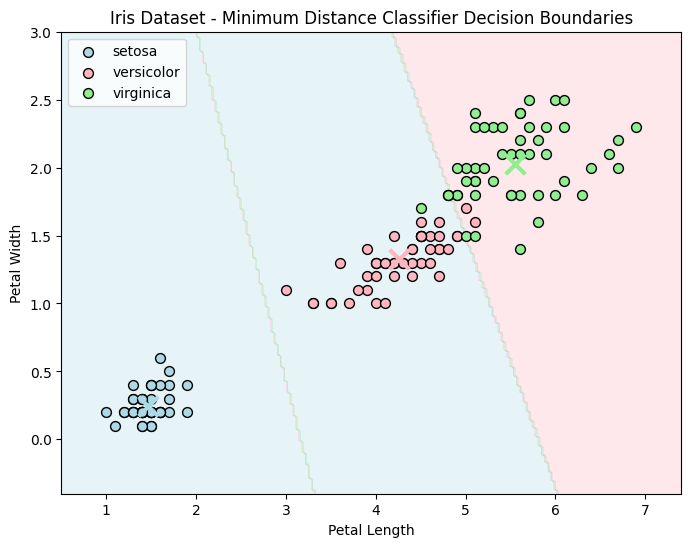

In [ ]:
# Minimum Distance Classifier Decision Boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# find the nearest class mean
Z = pairwise_distances_argmin(grid, class_means)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, colors=colors)
for i, color in enumerate(colors):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], c=color, label=target_names[i], edgecolor="k", s=50
    )
    plt.scatter(
        class_means[i, 0],
        class_means[i, 1],
        color=color,
        marker="x",
        s=200,
        linewidths=3,
    )

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Minimum Distance Classifier Decision Boundaries")
plt.legend()
plt.show()